# Treinando YOLO v8

## Bibliotecas necessárias

In [ ]:
conda install ultralytics

In [8]:
from ultralytics import YOLO
import os
import cv2
from math import sqrt
import matplotlib.pyplot as plt

## Funções Auxiliares

### Mostrar imagens através do Matplot

In [9]:
def mostrar(img):
  fig = plt.gcf()
  fig.set_size_inches(16, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

## Dados Locais

## Preparação do dataset

A estrutura necessária é a seguinte

* /dataset
  * /train
  * /val

## Configurações do Arquivo de Configuração (YAML)

* path: [caminho do diretório que contém o dataset]
* train: [caminho do conjunto de treinamento, relativo ao path]
* val: [caminho do conjunto de validação, relativo ao path]
* test: [não é necessário pois faremos depois um teste manual]

**Número de Classes**
* nc: [coloca o numero de classes que deseja treinar]

**Nomes/Labels - substitua pelos nomes das classes**
* names: [nome de cada classe, dentro de '' e separado por vírgula]

## Treinamento do Modelo

In [10]:
diretorio_raiz = ''
arquivo_config = os.path.join(diretorio_raiz, 'configs_detection.yaml')

In [11]:
model = YOLO('yolov8s.yaml') # inicializando a arquitetura com um modelo pré-treinado

> **Parâmetros da função de treinamento:**

* **task**: o que deseja-se ao treinar/validar a rede, ou seja, pode ser detecção de objetos (detect), segmentação (segment), etc.
* **mode**: pode ser train, val, ou predict.
* **model**: modelo pré-treinado desejado para ser a base do treinamento ou validação, podendo ser YOLOv8n, YOLOv8 Small YOLOv8s, etc.
* **imgsz**: tamanho da imagem a entrar na rede (padrão 640). O Algoritmo é capaz de redimensionar para o tamanho passado. Quanto maior o tamanho, maior será a precisão em relação a objetos pequenos.
* **data**: caminho para o arquivo de configuração YAML.
* **epochs**: números de épocas de treinamento.
* **batch**: O tamanho do batch (lote) para carregar os dados na rede (padrão 16).
* **name**: Nome do diretório de resultados para o runs/detect. (opcional)

In [ ]:
resultados = model.train(data=arquivo_config, epochs=250, imgsz=640, name='yolov8s_ensemble_time') # Treinando o modelo

New https://pypi.org/project/ultralytics/8.2.50 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.11 🚀 Python-3.10.12 torch-2.1.1+cu121 CPU (AMD Ryzen 7 3700U with Radeon Vega Mobile Gfx)
engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=configs_detection.yaml, epochs=250, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8s_ensemble_time, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks

2024-07-07 23:35:02.056794: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-07 23:35:02.056888: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-07 23:35:02.088716: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

train: Scanning /home/pedroklesse/IC/YOLO/Ensemble/dataset-yolo-detection/train.
val: Scanning /home/pedroklesse/IC/YOLO/Ensemble/dataset-yolo-detection/valid.ca

 O modelo gera o diretório abaixo:

In [2]:
dir_resultado='C:/IC/YOLO/Detection/notebooks/runs/detect/yolov8s_detected'

Este diretório contém a pasta weights, onde estão dois arquivos:
* **best.pt**: pesos da rede referente a melhor época do treinamento
* **last.pt**: pesos da rede referente a última época de treinamento

## Avaliação do Modelo - Verificando o mAp do modelo

In [ ]:
!yolo task=detect mode=val model={dir_resultado}/weights/best.pt name=yolov8s_modelo_eval data=configs_modelo.yaml

A própria rede gera gráficos das métricas de desempenho em relação a época de treinamento.

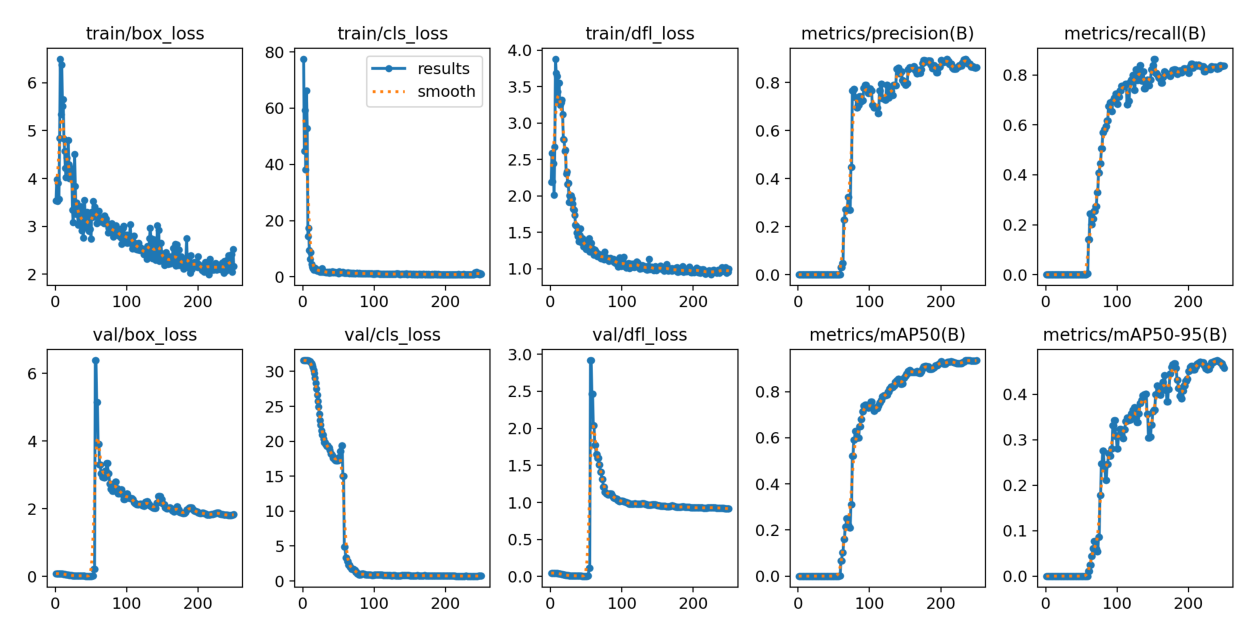

In [5]:
resultados_grafico = cv2.imread(os.path.join(dir_resultado, 'results.png'))
mostrar(resultados_grafico)

## Testando o Modelo Treinado

Parâmetros:
* **task**: refere-se a atividade que a rede neural irá desempenhar, neste caso ela irá detectar objetos na imagem
* **mode**: 
* **model**: pesos que a rede utilizará para reealizar a atividade passada
* **source**: pasta das imagens para o teste
* **save**: true ==> salvará as imagens de saída | false ==> não salvará as imagens de saída
* **conf**: nível de confiança aceitável para realizar a tarefa, ou seja, caso conf seja 0.4 e esteja realizando uma detecção, na imagem de saída só aparecerá a detecção de objetos com uma confiança de previsão acima de 40%. Este valor vai de 0 até 1.

In [7]:
!yolo task=detect mode=predict model={dir_resultado}/weights/best.pt source='C:/IC/YOLO/Detection/notebooks/imagens_teste' save=true conf=0.4

Traceback (most recent call last):
  File "/home/pedroklesse/.local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/home/pedroklesse/.local/lib/python3.10/site-packages/ultralytics/cfg/__init__.py", line 556, in entrypoint
    model = YOLO(model, task=task)
  File "/home/pedroklesse/.local/lib/python3.10/site-packages/ultralytics/models/yolo/model.py", line 23, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/home/pedroklesse/.local/lib/python3.10/site-packages/ultralytics/engine/model.py", line 151, in __init__
    self._load(model, task=task)
  File "/home/pedroklesse/.local/lib/python3.10/site-packages/ultralytics/engine/model.py", line 240, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/home/pedroklesse/.local/lib/python3.10/site-packages/ultralytics/nn/tasks.py", line 806, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/home/pedroklesse/.local/lib/python

## Extraindo os padrões

- **Referência**: https://blog.roboflow.com/how-to-use-yolov8-with-sam/

In [1]:
import ultralytics
from ultralytics import YOLO
from IPython.display import display, Image
import torch
#from roboflow import Roboflow
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
model = YOLO('/home/pedroklesse/IC/YOLO/Ensemble/notebooks/best_ensemble_final.pt')

In [3]:
input = cv2.cvtColor(cv2.imread('./test/43in.jpg'), cv2.COLOR_BGR2RGB)

In [4]:
results = model.predict(source=input, conf=0.25)


0: 640x640 80 noteheads, 20 beams, 484.5ms
Speed: 5.6ms preprocess, 484.5ms inference, 553.4ms postprocess per image at shape (1, 3, 640, 640)


In [5]:
classes=[]
bboxes = []
for result in results:
    
    boxes = result.boxes
    #classes.append(result.probs)
for box in boxes:
    if box.cls == 2:
        bboxes.append(box.xyxy.tolist()[0])

In [7]:
bboxes

[[112.03589630126953,
  628.1028442382812,
  123.85070037841797,
  638.0725708007812],
 [273.4908752441406, 648.30517578125, 285.0237731933594, 658.177001953125],
 [159.9956817626953, 637.4364624023438, 171.00833129882812, 647.8278198242188],
 [260.68145751953125,
  643.3087158203125,
  270.46209716796875,
  652.9757690429688],
 [89.80449676513672, 381.0125732421875, 101.90299987792969, 390.89111328125],
 [315.1730041503906, 429.3899230957031, 326.4489440917969, 439.2468566894531],
 [112.68319702148438,
  691.5272216796875,
  123.70853424072266,
  700.3895263671875],
 [314.0797424316406, 691.616455078125, 325.2266540527344, 700.74072265625],
 [119.67103576660156, 380.9764709472656, 131.5122833251953, 390.6148376464844],
 [373.47003173828125,
  429.3927001953125,
  384.94976806640625,
  439.09576416015625],
 [200.99038696289062, 639.044189453125, 212.19381713867188, 650.1348876953125],
 [398.930419921875, 511.8474426269531, 411.4534606933594, 521.8250122070312],
 [369.7835998535156, 509

In [6]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
from time import perf_counter


image = cv2.cvtColor(cv2.imread('./test/43in.jpg'), cv2.COLOR_BGR2RGB)
image = image.astype(np.uint8)


sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
start = perf_counter()
predictor = SamPredictor(sam)
predictor.set_image(image)

end = perf_counter()

print(f'Tempo de execução {end-start}')

Tempo de execução 96.06880456200001


In [18]:
image.shape

(800, 565, 3)

In [7]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2)) 

In [8]:
input_boxes = []
#input_box = np.array(bbox)
masks_general = []
for bbox in bboxes:
    masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=np.array([bbox]),
    multimask_output=False,
    )
    masks_general.append(masks)
    input_boxes.append(np.array(bbox))

In [15]:
len(masks_general[0][0][0])

565

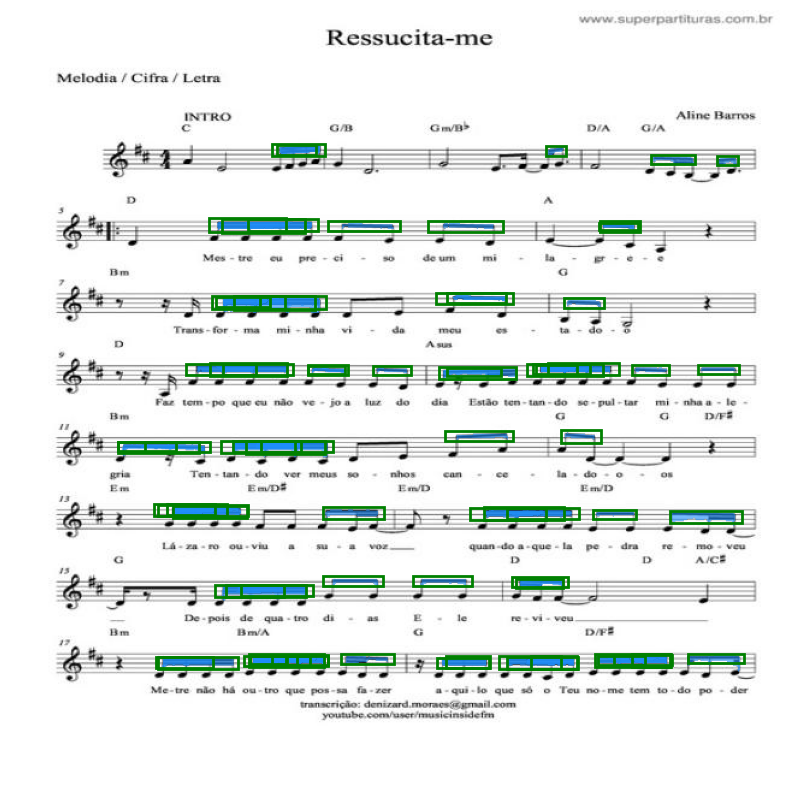

In [9]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
for masks, input_box in zip(masks_general, input_boxes):
    show_mask(masks[0], plt.gca())
    show_box(input_box, plt.gca())
plt.axis('off')
plt.show()

In [9]:
mask_total = masks_general[0][0]
for masks in masks_general:
    mask_total = mask_total | masks[0]

In [11]:
mask_total.shape

(640, 640)

In [24]:
mask_total

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

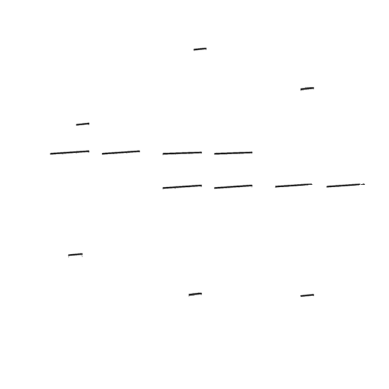

In [10]:
segmentation_mask = mask_total#masks[0]

# Convert the segmentation mask to a binary mask
binary_mask = np.where(segmentation_mask > 0.5, 1, 0)
white_background = np.ones_like(image) * 255

# Apply the binary mask
new_image = white_background * (1 - binary_mask[..., np.newaxis]) + image * binary_mask[..., np.newaxis]

plt.imshow(new_image.astype(np.uint8))
plt.axis('off')
plt.show()

In [12]:
cv2.imwrite('8-ensemble-notehead.png', new_image)

True

In [12]:
final_img = new_image[:,:,0]

In [13]:
img_test = cv2.imread('./test/beam/44out.jpg')[:,:,0]

## Funções de Fitness - Metrificação (Comparação entre Output gerado e Output desejado)

### Função de Fitness A

In [14]:
# Mul entre Imagens

def image_mul(image1, image2):
  if (len(image1) == len(image2)):
    N = len(image1)
  else:
    print('Imagens não compatíveis: Tamanhos diferentes')
    return
  image1 = image1.astype(np.uint16)/255
  image2 = image2.astype(np.uint16)/255
  sum = 0
  for i in range(image1.shape[0]):
    for j in range(image1.shape[1]):
      sum += image1[i][j] * image2[i][j]
  return sum*(1/N)/(1/N)

# Função de Fitness

def fit_a(imagem1, imagem2):
  return (image_mul(imagem1, imagem2))/((sqrt(image_mul(imagem1, imagem1)))*(sqrt(image_mul(imagem2, imagem2))))

### Função de Fitness B

In [15]:
def fit_b(image1, image2):
    TP = 0
    TN = 0
    FP = 0
    FN = 0

    if len(image1) != len(image2) or len(image1[0]) != len(image2[0]):
        print('Imagens não compatíveis: Tamanhos diferentes')
        return

    N = len(image1)
    image1 = image1.astype(np.uint16) / 255
    image2 = image2.astype(np.uint16) / 255

    for i in range(N):
        for j in range(N):
            if image1[i][j] == 1 and image2[i][j] == 1:
                TP += 1
            elif image1[i][j] == 0 and image2[i][j] == 1:
                FP += 1
            elif image1[i][j] == 1 and image2[i][j] == 0:
                FN += 1
            elif image1[i][j] == 0 and image2[i][j] == 0:
                TN += 1

    SV = TP / (TP + FN) if (TP + FN) != 0 else 0
    SP = TN / (TN + FP) if (TN + FP) != 0 else 0

    return 1 - ((sqrt((1 - SP) ** 2 + (1 - SV) ** 2)) / sqrt(2))


### Resultados

In [16]:
print(f"Resultado fa: {fit_a(final_img, img_test)}")
print(f"Resultado fb: {fit_b(final_img, img_test)}")

Resultado fa: 0.9989877715151142
Resultado fb: 0.9993301534340447


## Métricas no DataFrame - Testes

In [22]:
import numpy as np
import pandas as pd

test_images = [1,2,3,4,5,6,7,8,9,10]

metrics = pd.DataFrame(index=test_images, columns=['fa_notehead', 'fb_notehead',
                                                       'fa_beam', 'fb_beam'])

metrics.iloc[0]['fa_notehead'] = 'aoba'
print(metrics)

   fa_notehead fb_notehead fa_beam fb_beam
1         aoba         NaN     NaN     NaN
2          NaN         NaN     NaN     NaN
3          NaN         NaN     NaN     NaN
4          NaN         NaN     NaN     NaN
5          NaN         NaN     NaN     NaN
6          NaN         NaN     NaN     NaN
7          NaN         NaN     NaN     NaN
8          NaN         NaN     NaN     NaN
9          NaN         NaN     NaN     NaN
10         NaN         NaN     NaN     NaN
